In [220]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
olympics=1
if olympics==1:
    dataset=pd.read_csv('./Data/olympics_100m.csv')
else:
    dataset=pd.read_csv('./Data/test.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


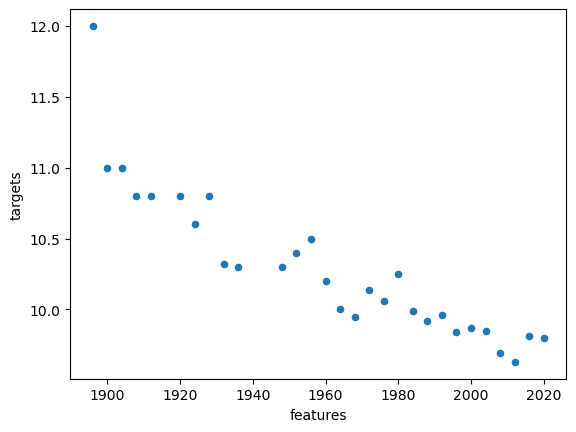

In [221]:
#plot
if dataset.shape[1]==2:
    dataset.plot.scatter(x='features',y='targets')

In [222]:
#coarse to fine approach
from ridge import Ridge_Regression
X=dataset.drop('targets',axis=1).values.reshape(-1,dataset.shape[1]-1)
Y=dataset['targets'].values.reshape(-1,1)
## given the low amount of data available we decided to do a K-fold cross validation
## the parameter lambda follows a coarse to fine approach
## the coarse search is done with a step of 0.1 and the fine search with a step of 0.01
k=len(X)
fold_size=int(len(X)/k)
lambda_mses=[]
# generate the intervals for the coarse to fine approach from 1 to 10^-20
lambda_values=np.array(10.0 ** np.arange(10, -10, -1))
for lambda_value in lambda_values:
    print('Lambda value: ',lambda_value)
    ridge=Ridge_Regression(lambda_value)
    mses=[]
    for i in range(k):
        # K-fold cross validation (take the data from the i-th fold as test data)
        Xi=np.concatenate((X[:i*fold_size],X[(i+1)*fold_size:]),axis=0)
        Yi=np.concatenate((Y[:i*fold_size],Y[(i+1)*fold_size:]),axis=0)
        ridge.Train(Xi,Yi)
        y_pred=ridge.Predict(X[i*fold_size:(i+1)*fold_size])
        mses.append(((Y[i*fold_size:(i+1)*fold_size]-y_pred)**2).mean())
    lambda_mses.append(np.mean(mses))
    print('lambda: ',lambda_value,' mse: ',np.mean(mses))
print('best lambda atm: ',lambda_values[np.argmin(lambda_mses)])
lambda_value=lambda_values[np.argmin(lambda_mses)]

Lambda value:  10000000000.0
lambda:  10000000000.0  mse:  0.28054013136368605
Lambda value:  1000000000.0
lambda:  1000000000.0  mse:  0.2805247839163117
Lambda value:  100000000.0
lambda:  100000000.0  mse:  0.28037139767476843
Lambda value:  10000000.0
lambda:  10000000.0  mse:  0.2788463132040361
Lambda value:  1000000.0
lambda:  1000000.0  mse:  0.2644300812436757
Lambda value:  100000.0
lambda:  100000.0  mse:  0.1747919466720426
Lambda value:  10000.0
lambda:  10000.0  mse:  0.07016416316702638
Lambda value:  1000.0
lambda:  1000.0  mse:  0.061546928087101806
Lambda value:  100.0
lambda:  100.0  mse:  0.061493293227721825
Lambda value:  10.0
lambda:  10.0  mse:  0.061500782011564996
Lambda value:  1.0
lambda:  1.0  mse:  0.061501666119390445
Lambda value:  0.1
lambda:  0.1  mse:  0.06150175588897269
Lambda value:  0.01
lambda:  0.01  mse:  0.06150176487933574
Lambda value:  0.001
lambda:  0.001  mse:  0.061501765779364295
Lambda value:  0.0001
lambda:  0.0001  mse:  0.0615017658

In [223]:
order_of_magnitude=lambda_value
for order in np.array(10.0 ** np.arange(np.log10(order_of_magnitude)+1, -10, -1)):
    lambda_values=np.linspace(max(lambda_values[np.argmin(lambda_mses)]-1*order,0),lambda_values[np.argmin(lambda_mses)]+1*order,num=(20+1))
    lambda_mses=[]
    for lambda_value in lambda_values:
        print('lambda_value: ',lambda_value)
        ridge=Ridge_Regression(lambda_value)
        mses=[]
        for i in range(k):
            # K-fold cross validation (take the data from the i-th fold as test data)
            Xi=np.concatenate((X[:i*fold_size],X[(i+1)*fold_size:]),axis=0)
            Yi=np.concatenate((Y[:i*fold_size],Y[(i+1)*fold_size:]),axis=0)
            ridge.Train(Xi,Yi)
            y_pred=ridge.Predict(X[i*fold_size:(i+1)*fold_size])
            mses.append(((Y[i*fold_size:(i+1)*fold_size]-y_pred)**2).mean())
        lambda_mses.append(np.mean(mses))
        print('lambda: ',lambda_value,' mse: ',np.mean(lambda_mses))
    print('best lambda atm: ',lambda_values[np.argmin(lambda_mses)])
    lambda_value=lambda_values[np.argmin(lambda_mses)]

print('best lambda: ',lambda_value)

lambda_value:  0.0
lambda:  0.0  mse:  0.06150176587907515
lambda_value:  55.0
lambda:  55.0  mse:  0.06149924850674118
lambda_value:  110.0
lambda:  110.0  mse:  0.06149703635904039
lambda_value:  165.0
lambda:  165.0  mse:  0.061495127499293895
lambda_value:  220.0
lambda:  220.0  mse:  0.06149352000305164
lambda_value:  275.0
lambda:  275.0  mse:  0.06149221195920409
lambda_value:  330.0
lambda:  330.0  mse:  0.06149120146968769
lambda_value:  385.0
lambda:  385.0  mse:  0.06149048664911108
lambda_value:  440.0
lambda:  440.0  mse:  0.06149006562502487
lambda_value:  495.0
lambda:  495.0  mse:  0.0614899365376864
lambda_value:  550.0
lambda:  550.0  mse:  0.06149009753973973
lambda_value:  605.0
lambda:  605.0  mse:  0.06149054679636057
lambda_value:  660.0
lambda:  660.0  mse:  0.0614912824851743
lambda_value:  715.0
lambda:  715.0  mse:  0.06149230279604449
lambda_value:  770.0
lambda:  770.0  mse:  0.06149360593096081
lambda_value:  825.0
lambda:  825.0  mse:  0.06149519010402514

In [224]:
ridge=Ridge_Regression(lambda_value)
ridge.Train(X,Y)
x=np.array([2010,2012,2014,2016,2018,2020]).reshape(-1,1)
y_pred=ridge.Predict(x.reshape(-1,1))
from sklearn.linear_model import Ridge
ridge_sklearn=Ridge(alpha=lambda_value)
ridge_sklearn.fit(X,Y)
y_pred_sklearn=ridge_sklearn.predict(x.reshape(-1,1))
for i in range(len(X)):
    print('year: ',X[i],' time: ',Y[i])
for i in range(len(x)):
    print('year: ',x[i],' time: ',y_pred[i])
    print('scikit: year: ',x[i],' time: ',y_pred_sklearn[i])
    
print('w_mio: ',ridge.__str__())
print('w_sklearn: ',ridge_sklearn.coef_,ridge_sklearn.intercept_)

year:  [1896]  time:  [12.]
year:  [1900]  time:  [11.]
year:  [1904]  time:  [11.]
year:  [1908]  time:  [10.8]
year:  [1912]  time:  [10.8]
year:  [1920]  time:  [10.8]
year:  [1924]  time:  [10.6]
year:  [1928]  time:  [10.8]
year:  [1932]  time:  [10.32]
year:  [1936]  time:  [10.3]
year:  [1948]  time:  [10.3]
year:  [1952]  time:  [10.4]
year:  [1956]  time:  [10.5]
year:  [1960]  time:  [10.2]
year:  [1964]  time:  [10.]
year:  [1968]  time:  [9.95]
year:  [1972]  time:  [10.14]
year:  [1976]  time:  [10.06]
year:  [1980]  time:  [10.25]
year:  [1984]  time:  [9.99]
year:  [1988]  time:  [9.92]
year:  [1992]  time:  [9.96]
year:  [1996]  time:  [9.84]
year:  [2000]  time:  [9.87]
year:  [2004]  time:  [9.85]
year:  [2008]  time:  [9.69]
year:  [2012]  time:  [9.63]
year:  [2016]  time:  [9.81]
year:  [2020]  time:  [9.8]
year:  [2010]  time:  [9.69580971]
scikit: year:  [2010]  time:  [9.69580971]
year:  [2012]  time:  [9.67153981]
scikit: year:  [2012]  time:  [9.67153981]
year

C:\Users\miche\anaconda3\envs\malis\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\miche\anaconda3\envs\malis\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\miche\anaconda3\envs\malis\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\miche\anaconda3\envs\malis\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\miche\anaconda3\envs\malis\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not w

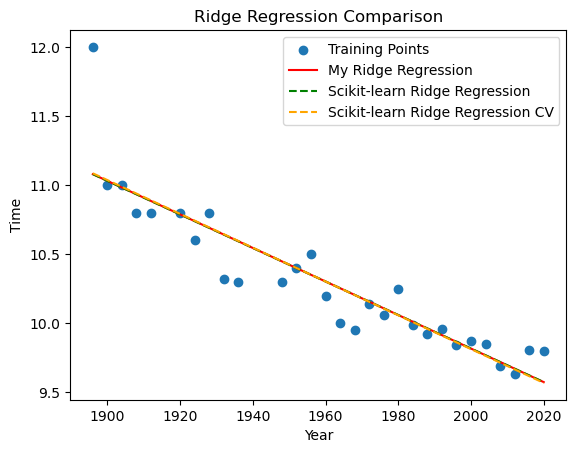

In [225]:
import matplotlib.pyplot as plt   
ridge=Ridge_Regression(lambda_value)
ridge.Train(X,Y)
y_pred=ridge.Predict(X)
from sklearn.linear_model import Ridge
ridge_sklearn=Ridge(alpha=lambda_value)
ridge_sklearn.fit(X,Y)
y_pred_sklearn=ridge_sklearn.predict(X)
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=k)
ridge_cv.fit(X,Y)
y_pred_cv=ridge_cv.predict(X)
plt.scatter(X, Y, label='Training Points')
plt.plot(X, y_pred, label='My Ridge Regression', color='red')
plt.plot(X, y_pred_sklearn, label='Scikit-learn Ridge Regression', linestyle='--', color='green')
plt.plot(X, y_pred_cv, label='Scikit-learn Ridge Regression CV', linestyle='--', color='orange')

plt.title('Ridge Regression Comparison')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()